### I group similar customers without any labels, find patterns, and explain them nicely through diagrams and cluster plots

KMeans Clustering

PCA + t-SNE Visualization → Basic videos (2D visualization).

Graphviz basics → .

Unsupervised Learning Basics


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [1]:
file= pd.read_csv("/content/drive/MyDrive/task/Customer segemntation/shopping_trends.csv", dtype = str)

NameError: name 'pd' is not defined

In [ ]:
file.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               3900 non-null   object
 1   Age                       3900 non-null   object
 2   Gender                    3900 non-null   object
 3   Item Purchased            3900 non-null   object
 4   Category                  3900 non-null   object
 5   Purchase Amount (USD)     3900 non-null   object
 6   Location                  3900 non-null   object
 7   Size                      3900 non-null   object
 8   Color                     3900 non-null   object
 9   Season                    3900 non-null   object
 10  Review Rating             3900 non-null   object
 11  Subscription Status       3900 non-null   object
 12  Payment Method            3900 non-null   object
 13  Shipping Type             3900 non-null   object
 14  Discount Applied        

In [ ]:
file.duplicated().sum()

np.int64(0)

(array([454., 384., 366., 366., 362., 415., 385., 360., 374., 434.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <BarContainer object of 10 artists>)

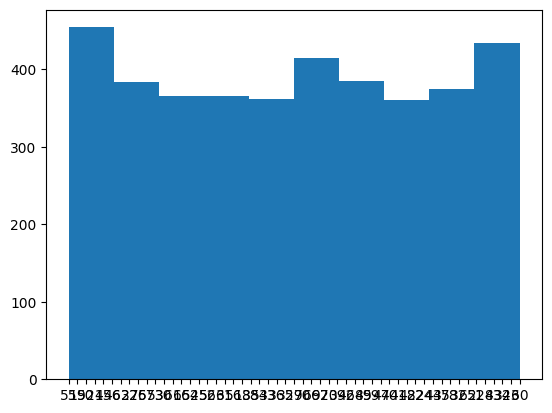

In [ ]:
plt.hist(file["Age"])

(array([2652.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1248.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

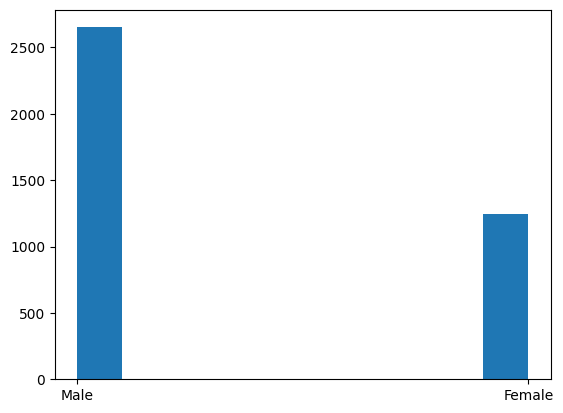

In [ ]:
plt.hist(file["Gender"])

In [ ]:
file.tail(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


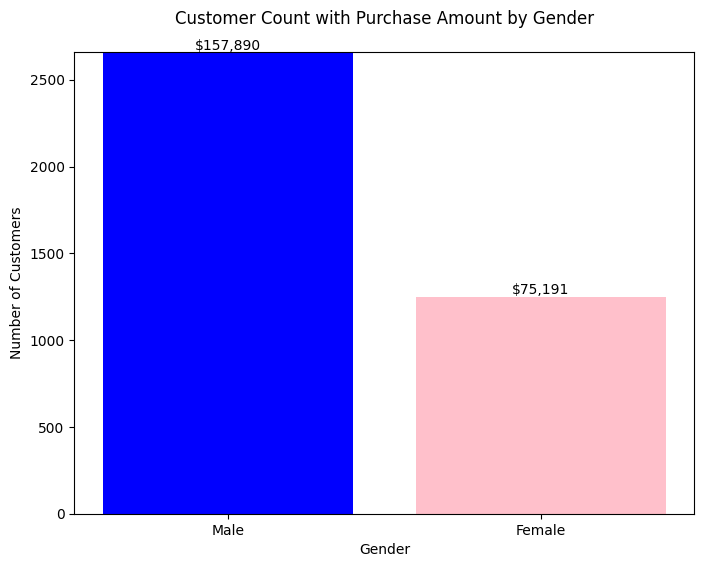

In [ ]:
import matplotlib.pyplot as plt

# Calculate data
amount_total = [
    file[file["Gender"] == "Male"]["Purchase Amount (USD)"].astype(int).sum(),
    file[file["Gender"] == "Female"]["Purchase Amount (USD)"].astype(int).sum()
]
amount_total = [int(x) for x in amount_total]

gender_count = file["Gender"].value_counts().to_list()
genders = ['Male', 'Female']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(genders, gender_count, color=['blue', 'pink'])

# Add purchase amount labels on top
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'${amount_total[i]:,}', ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Count with Purchase Amount by Gender', pad=20)
plt.ylim(0, max(gender_count) + 10)  # Add a little space at top

plt.show()


In [ ]:
file.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


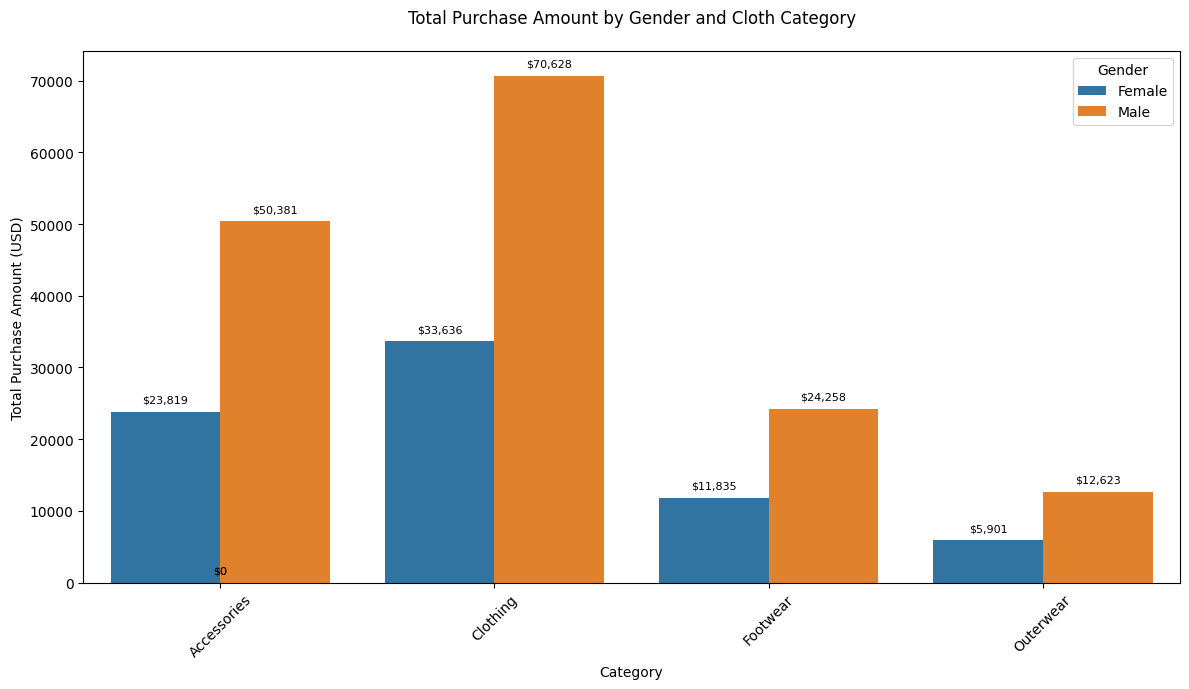

In [ ]:

file["Purchase Amount (USD)"] = file["Purchase Amount (USD)"].astype(int)
# Group the data
grouped = file.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Convert purchase amount to integers
grouped['Purchase Amount (USD)'] = grouped['Purchase Amount (USD)'].astype(int)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=grouped, x='Category', y='Purchase Amount (USD)', hue='Gender')

# Add the amount on top of each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height() + 1000,
             f'${int(p.get_height()):,}', ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Gender and Cloth Category', pad=20)

plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [ ]:
file.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


In [ ]:
file.Location.value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


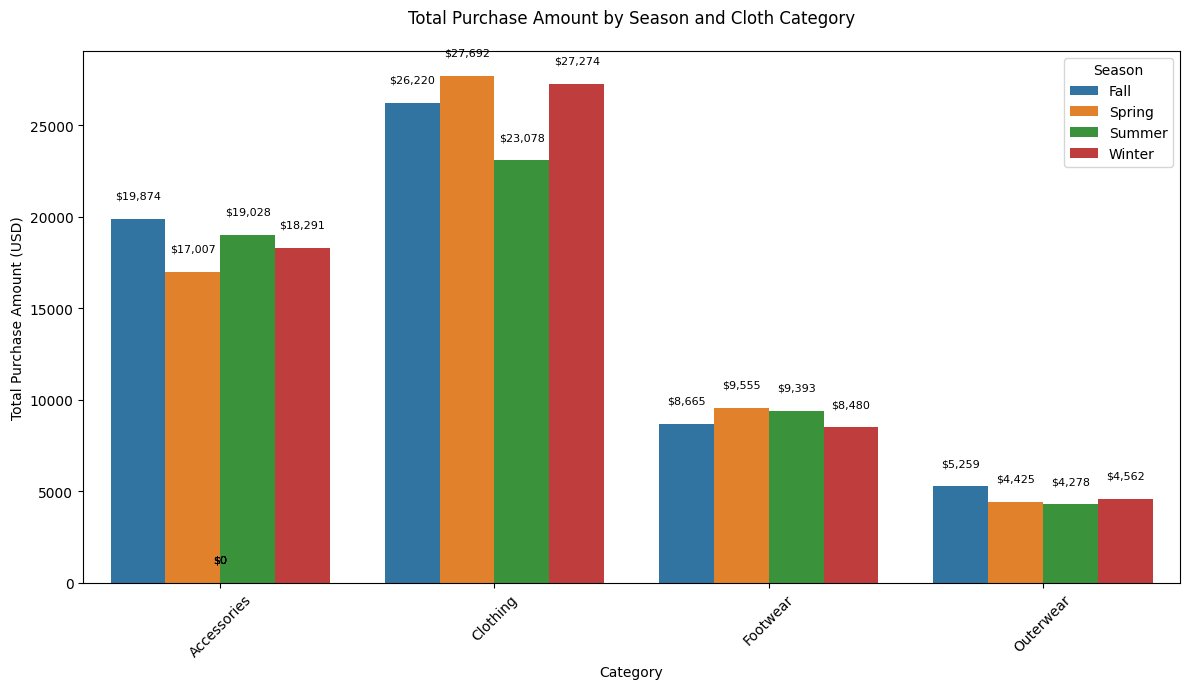

In [ ]:

file["Purchase Amount (USD)"] = file["Purchase Amount (USD)"].astype(int)
# Group the data
grouped = file.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Convert purchase amount to integers
grouped['Purchase Amount (USD)'] = grouped['Purchase Amount (USD)'].astype(int)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=grouped, x='Category', y='Purchase Amount (USD)', hue='Season')

# Add the amount on top of each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height() + 1000,
             f'${int(p.get_height()):,}', ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Season and Cloth Category', pad=20)

plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


In [ ]:
file.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


(array([696.,   0., 632.,   0., 648.,   0., 638.,   0., 653., 633.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

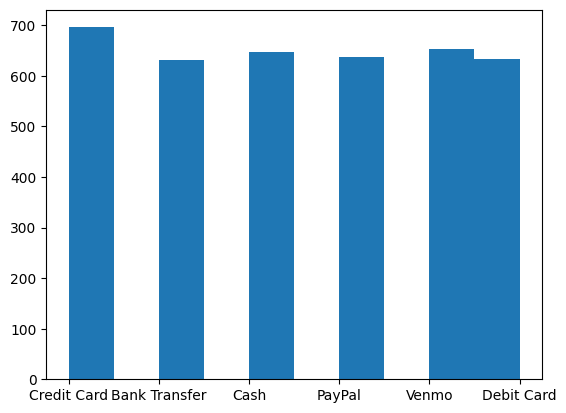

In [ ]:
plt.hist(file["Payment Method"])

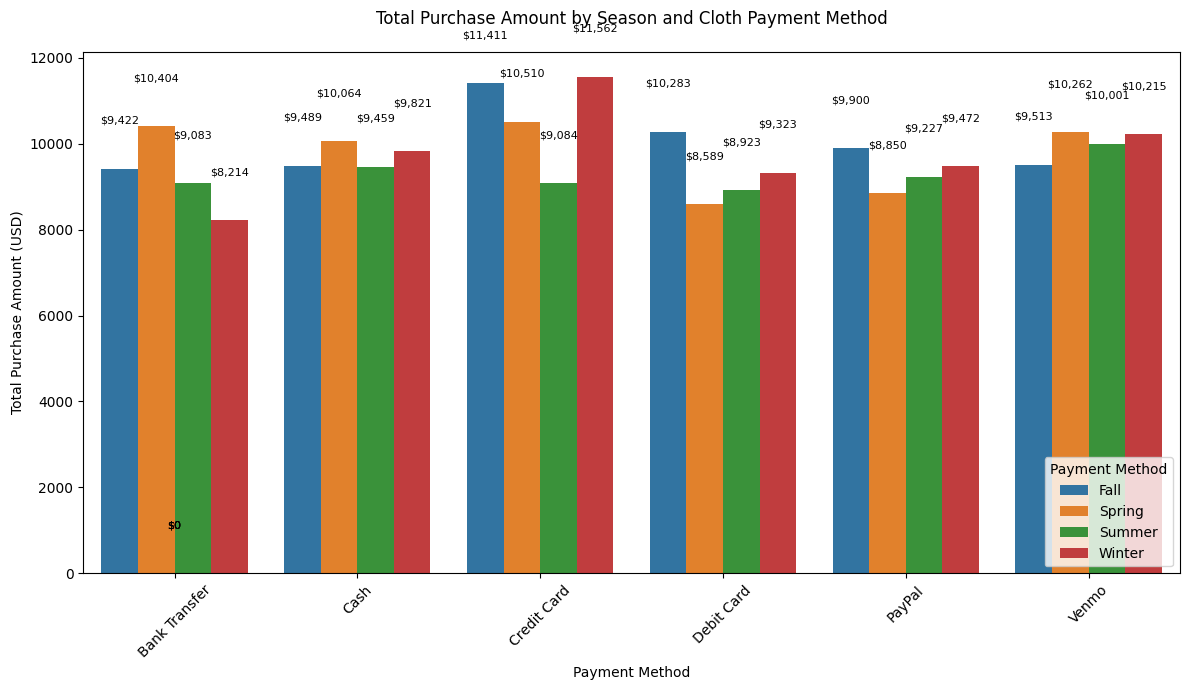

In [ ]:

file["Purchase Amount (USD)"] = file["Purchase Amount (USD)"].astype(int)
# Group the data
grouped = file.groupby(['Season', 'Payment Method'])['Purchase Amount (USD)'].sum().reset_index()

# Convert purchase amount to integers
grouped['Purchase Amount (USD)'] = grouped['Purchase Amount (USD)'].astype(int)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=grouped, x='Payment Method', y='Purchase Amount (USD)', hue='Season')

# Add the amount on top of each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height() + 1000,
             f'${int(p.get_height()):,}', ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Season and Cloth Payment Method', pad=20)

plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

In [ ]:
file.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


(array([542., 539.,   0., 572.,   0., 563., 547.,   0., 553., 584.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

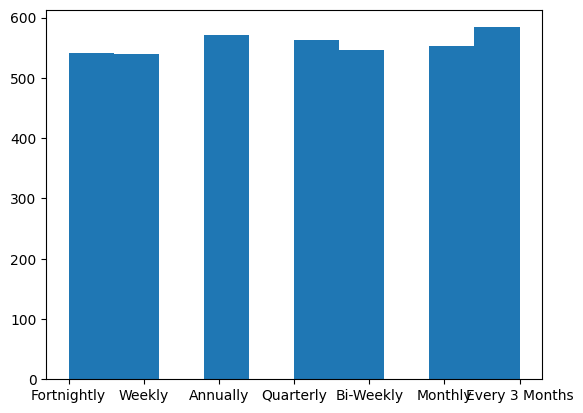

In [ ]:
plt.hist(file["Frequency of Purchases"])

In [ ]:
file.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


In [ ]:
def review(x):
  x = float(x)
  if(x >0) & (x<=1):
    x = 1
  elif (x >1) & (x<2):
    x=2
  elif (x >2) & (x<3):
    x=3
  elif (x >3) & (x<4):
    x=4
  elif (x >4)&  (x<5):
    x=5
  return x
file["Review Rating"]= file["Review Rating"].apply(review)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
le = LabelEncoder()
file =  file[["Age",'Gender', 'Category',
       'Purchase Amount (USD)',  'Season',
       'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied',
       'Frequency of Purchases']]
columns = ['Gender', 'Category', 'Season',
       'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied',
       'Frequency of Purchases']
# Apply label encoding to the 'color' column
for col in columns:
  print(col)
  file[col] = le.fit_transform(file[col])

file.head()

Gender
Category
Season
Subscription Status
Payment Method
Shipping Type
Discount Applied
Frequency of Purchases


,Age,Gender,Category,Purchase Amount (USD),Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Frequency of Purchases
0,55,1,1,53,3,1,2,1,1,3
1,19,1,1,64,3,1,0,1,1,3
2,50,1,1,73,1,1,1,2,1,6
3,21,1,2,90,1,1,4,3,1,6
4,45,1,1,49,1,1,1,2,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
file['Purchase Amount (USD)'] = scaler.fit_transform(file[['Purchase Amount (USD)']])
file["Age"] = scaler.fit_transform(file[["Age"]])

In [ ]:
file

,Age,Gender,Category,Purchase Amount (USD),Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Frequency of Purchases
0,0.718913,1,1,-0.285629,3,1,2,1,1,3
1,-1.648629,1,1,0.178852,3,1,0,1,1,3
2,0.390088,1,1,0.558882,1,1,1,2,1,6
3,-1.517099,1,2,1.276716,1,1,4,3,1,6
4,0.061263,1,1,-0.454531,1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
3895,-0.267563,0,1,-1.341267,2,0,1,0,0,6
3896,0.521618,0,0,-0.454531,1,0,4,5,0,1
3897,0.127028,0,0,-1.130139,1,0,2,4,0,5
3898,-0.004502,0,2,0.727784,2,0,4,1,0,6


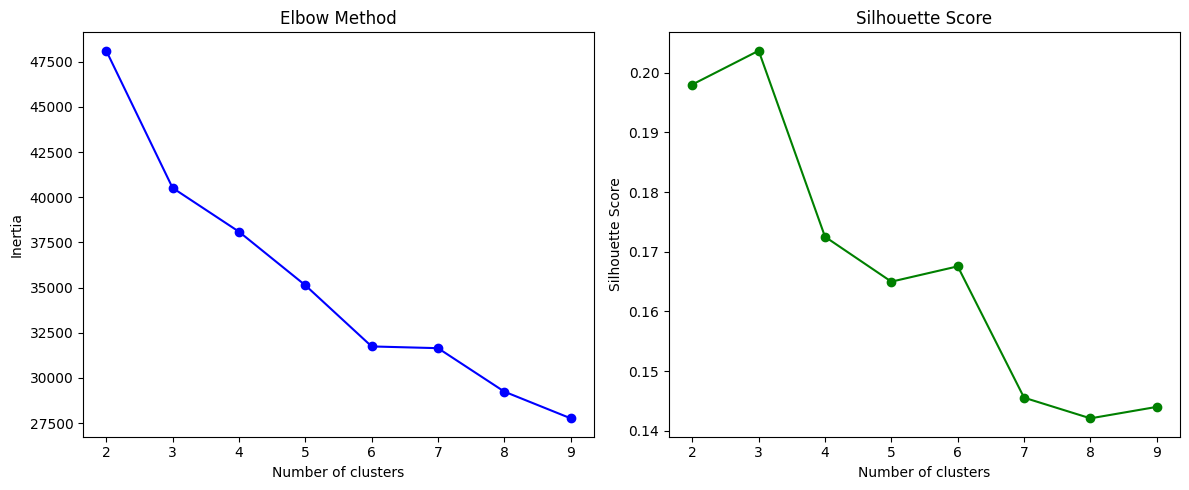

In [ ]:

df = file

#KMeans Clustering
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, preds))

#  Plot to find the best number of clusters (Elbow and Silhouette)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()


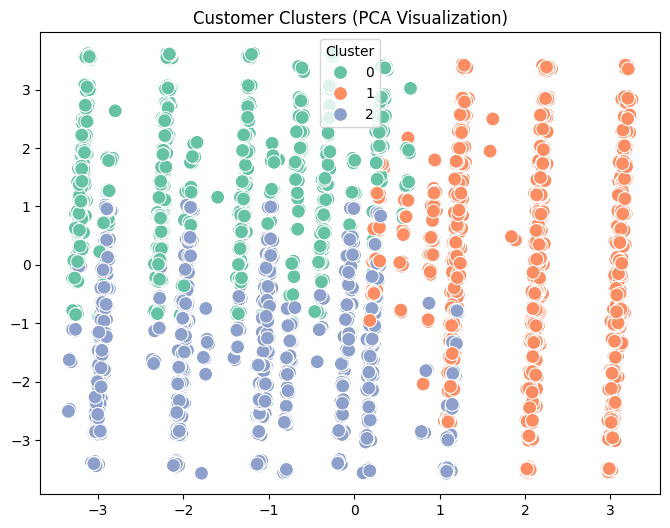

In [ ]:

# Choose the best cluster number (Suppose 3 for example)
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(df)

#  Visualize Clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.show()


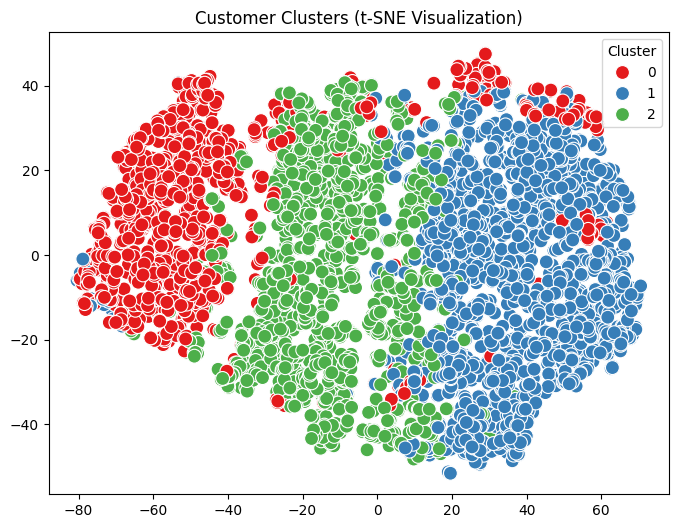

In [ ]:

# 5. (Optional) Visualize Clusters with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Clusters (t-SNE Visualization)')
plt.show()


Cluster 0 = High Age, High Purchase

Cluster 1 = Young, frequent buyers

Cluster 2 = Seasonal, occasional buyers